In [10]:
import pandas as pd

In [11]:
data=pd.read_csv('Titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
#handling missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

#feature engineering  : create new feature 'Familysize'
data['Familysize'] = data['SibSp']+data['Parch']

#convert 'sex' and 'Embarked' to numerical values
data= pd.get_dummies(data, columns=['Sex','Embarked'],drop_first=True)

#drop irrelevent coloumns
data.drop(columns=['Name','Ticket','Cabin'], inplace=True)


<ipython-input-12-8a73e398494e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
<ipython-input-12-8a73e398494e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [13]:
print(data)

     PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Familysize  \
0              1         0       3  22.0      1      0   7.2500           1   
1              2         1       1  38.0      1      0  71.2833           1   
2              3         1       3  26.0      0      0   7.9250           0   
3              4         1       1  35.0      1      0  53.1000           1   
4              5         0       3  35.0      0      0   8.0500           0   
..           ...       ...     ...   ...    ...    ...      ...         ...   
886          887         0       2  27.0      0      0  13.0000           0   
887          888         1       1  19.0      0      0  30.0000           0   
888          889         0       3  28.0      1      2  23.4500           3   
889          890         1       1  26.0      0      0  30.0000           0   
890          891         0       3  32.0      0      0   7.7500           0   

     Sex_male  Embarked_Q  Embarked_S  
0        Tr

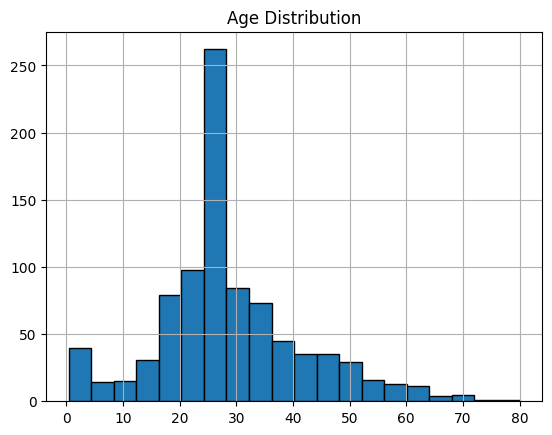

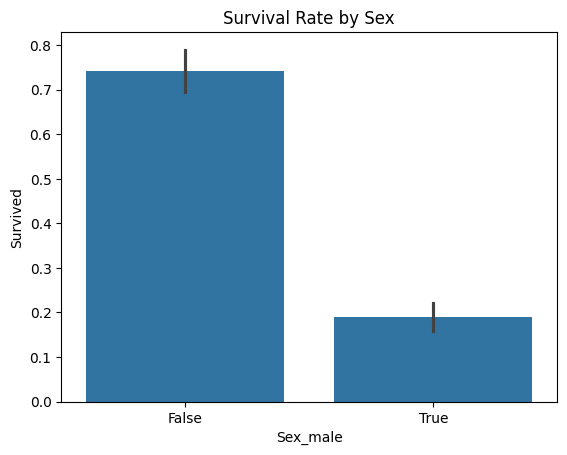

In [15]:
#EDA
import seaborn as sns
import matplotlib.pyplot as plt

#histograms
data['Age'].hist(bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.show()

#survival by sex

sns.barplot(x='Sex_male', y='Survived', data=data)
plt.title('Survival Rate by Sex')
plt.show()



In [16]:
#data

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#split the data into features and target
X=data.drop('Survived',axis=1)
y=data['Survived']

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# predict on the test set
y_pred = model.predict(X_test)

#evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.770949720670391
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.81       105
           1       0.75      0.68      0.71        74

    accuracy                           0.77       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179

Confusion Matrix:
 [[88 17]
 [24 50]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
